In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from umap import UMAP
import seaborn as sns
sns.set(style = 'white', font_scale=1.5)


In [19]:
from glob import glob

In [20]:
tsvs = glob('./PT*/*/metric_performance.tsv')

In [21]:
res = []
for tsv in tsvs:
    df = pd.read_csv(tsv, sep='\t', index_col = 0)
    _, mode, seed, _ = tsv.split('/')
    df['mode'] = mode
    df['seed'] = seed
    res.append(df)

In [22]:
c = sns.palettes.color_palette('rainbow', 2, desat = 1).as_hex()
c

['#2bdddd', '#d4dd80']

In [23]:
df = pd.concat(res)
df

,train_cohort,test_cohort,ROC,PRC,F1,ACC,MCC,mode,seed
0,~SU2CLC1(Pembro),SU2CLC1(Pembro),0.660870,0.494901,0.500000,0.575758,0.204656,PT(10K)-LFT(69),24
0,~SU2CLC1(Pembro),SU2CLC1(Pembro),0.743478,0.711864,0.560000,0.666667,0.325042,PT(10K)-LFT(69),42
0,~SU2CLC1(Pembro),SU2CLC1(Pembro),0.791304,0.706613,0.580645,0.606061,0.361372,PT(10K)-LFT(69),64
0,~SU2CLC1(Pembro),SU2CLC1(Pembro),0.582609,0.429714,0.400000,0.545455,0.060193,PT(10K)-NFT(69),24
0,~SU2CLC1(Pembro),SU2CLC1(Pembro),0.582609,0.429714,0.400000,0.545455,0.060193,PT(10K)-NFT(69),42
0,~SU2CLC1(Pembro),SU2CLC1(Pembro),0.582609,0.429714,0.400000,0.545455,0.060193,PT(10K)-NFT(69),64
0,~SU2CLC1(1K),SU2CLC1(Pembro),0.847826,0.837587,0.700000,0.818182,0.569565,PT(10K)-PFT(1031),24
0,~SU2CLC1(1K),SU2CLC1(Pembro),0.843478,0.833021,0.750000,0.878788,0.714920,PT(10K)-PFT(1031),42
0,~SU2CLC1(1K),SU2CLC1(Pembro),0.873913,0.880713,0.750000,0.878788,0.714920,PT(10K)-PFT(1031),64
0,~SU2CLC1(Pembro),SU2CLC1(Pembro),0.847826,0.837587,0.736842,0.848485,0.632599,PT(10K)-PFT(1031)-LFT(69),24


In [147]:
metrics = ['ACC','ROC', 'PRC', 'F1', 'MCC']


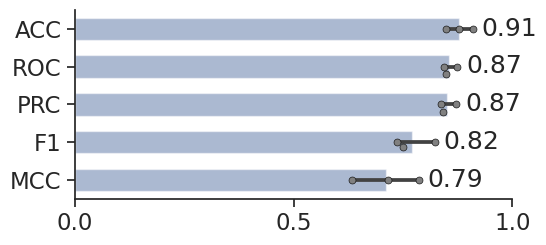

In [153]:
mode = 'PT(10K)-PFT(1031)-LFT(69)'

dfp = df[df['mode'] == mode]
dfpp = dfp[metrics].mean().to_frame()

std = dfp[metrics].std().to_frame()
mydata = dfp[metrics].unstack().reset_index()

fig, ax3 = plt.subplots(figsize=(6,3))

sns.barplot(data = mydata, y = 'level_0', x = 0,  orient='h', ax=ax3, order = metrics, color = 'b', alpha = 0.5, width = 0.6, capsize =0.0)
sns.swarmplot(data = mydata, y = 'level_0', x = 0,  orient='h', ax=ax3, order = metrics, edgecolor='k',color='grey',  linewidth =0.5, size=5)

ax3.yaxis.tick_left() # x axis on top
ax3.yaxis.set_label_position('left')
ax3.set_xticks([0.0, 0.5, 1.0])
ax3.xaxis.tick_bottom() # x axis on top
ax3.xaxis.set_label_position('bottom')
ax3.set_ylabel(None)
ax3.set_xlabel(None)

for y, x in dfp[metrics].max().reset_index(drop=True).items():
    ax3.text(x+0.02, y+0.18, '%.2f' % x )
    
ax3.spines[['right', 'top']].set_visible(False)

fig.tight_layout(pad = 1.5)
fig.savefig('%s.svg' % mode, bbox_inches='tight')

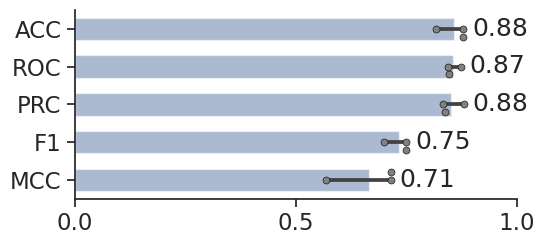

In [152]:
mode = 'PT(10K)-PFT(1031)'

dfp = df[df['mode'] == mode]
dfpp = dfp[metrics].mean().to_frame()

std = dfp[metrics].std().to_frame()
mydata = dfp[metrics].unstack().reset_index()

fig, ax3 = plt.subplots(figsize=(6,3))

sns.barplot(data = mydata, y = 'level_0', x = 0,  orient='h', ax=ax3, order = metrics, color = 'b', alpha = 0.5, width = 0.6, capsize =0.0)
sns.swarmplot(data = mydata, y = 'level_0', x = 0,  orient='h', ax=ax3, order = metrics, edgecolor='k',color='grey',  linewidth =0.5, size=5)

ax3.yaxis.tick_left() # x axis on top
ax3.yaxis.set_label_position('left')
ax3.set_xticks([0.0, 0.5, 1.0])
ax3.xaxis.tick_bottom() # x axis on top
ax3.xaxis.set_label_position('bottom')
ax3.set_ylabel(None)
ax3.set_xlabel(None)

for y, x in dfp[metrics].max().reset_index(drop=True).items():
    ax3.text(x+0.02, y+0.18, '%.2f' % x )
    
ax3.spines[['right', 'top']].set_visible(False)

fig.tight_layout(pad = 1.5)
fig.savefig('%s.svg' % mode, bbox_inches='tight')

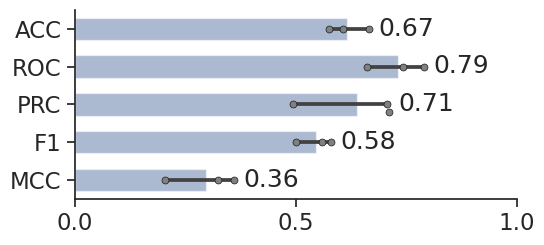

In [154]:
mode = 'PT(10K)-LFT(69)'
dfp = df[df['mode'] == mode]
dfpp = dfp[metrics].mean().to_frame()

std = dfp[metrics].std().to_frame()
mydata = dfp[metrics].unstack().reset_index()

fig, ax3 = plt.subplots(figsize=(6,3))

sns.barplot(data = mydata, y = 'level_0', x = 0,  orient='h', ax=ax3, order = metrics, color = 'b', alpha = 0.5, width = 0.6, capsize =0.0)
sns.swarmplot(data = mydata, y = 'level_0', x = 0,  orient='h', ax=ax3, order = metrics, edgecolor='k',color='grey',  linewidth =0.5, size=5)

ax3.yaxis.tick_left() # x axis on top
ax3.yaxis.set_label_position('left')
ax3.set_xticks([0.0, 0.5, 1.0])
ax3.xaxis.tick_bottom() # x axis on top
ax3.xaxis.set_label_position('bottom')
ax3.set_ylabel(None)
ax3.set_xlabel(None)

for y, x in dfp[metrics].max().reset_index(drop=True).items():
    ax3.text(x+0.02, y+0.18, '%.2f' % x )
    
ax3.spines[['right', 'top']].set_visible(False)

fig.tight_layout(pad = 1.5)
fig.savefig('%s.svg' % mode, bbox_inches='tight')

In [138]:
y

'MCC'

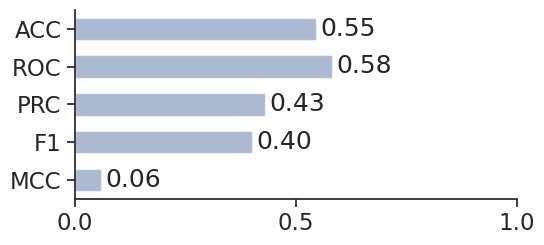

In [161]:
mode = 'PT(10K)-NFT(69)'
dfp = df[df['mode'] == mode]
dfpp = dfp[metrics].mean().to_frame()

std = dfp[metrics].std().to_frame()
mydata = dfp[metrics].unstack().reset_index()

fig, ax3 = plt.subplots(figsize=(6,3))

sns.barplot(data = mydata, y = 'level_0', x = 0,  orient='h', ax=ax3, order = metrics, color = 'b', alpha = 0.5, width = 0.6, capsize =0.0)
#sns.swarmplot(data = mydata, y = 'level_0', x = 0,  orient='h', ax=ax3, order = metrics, edgecolor='k',color='grey',  linewidth =0.5, size=5)

ax3.yaxis.tick_left() # x axis on top
ax3.yaxis.set_label_position('left')
ax3.set_xticks([0.0, 0.5, 1.0])
ax3.xaxis.tick_bottom() # x axis on top
ax3.xaxis.set_label_position('bottom')
ax3.set_ylabel(None)
ax3.set_xlabel(None)

for y, x in dfp[metrics].max().reset_index(drop=True).items():
    ax3.text(x+0.01, y+0.18, '%.2f' % x )
    
ax3.spines[['right', 'top']].set_visible(False)

fig.tight_layout(pad = 1.5)
fig.savefig('%s.svg' % mode, bbox_inches='tight')